# 円周上の三点をサンプリングして、円の半径と中心を求めるコードとその結果まとめ

In [1]:
import math
import datetime
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

def compute_circle(data, figname=None, dataset=None, circles=None):
    """
    3点を通る円の中心と半径を取得
    https://py3.hateblo.jp/entry/2014/02/23/172305
    """
    x1 = data[0]
    y1 = data[1]
    x2 = data[2]
    y2 = data[3]
    x3 = data[4]
    y3 = data[5]
    
    d = 2 * ((y1 - y3) * (x1 - x2) - (y1 - y2) * (x1 - x3))
    x = ((y1 - y3) * (y1 ** 2 - y2 ** 2 + x1 ** 2 - x2 ** 2) - (y1 - y2) * (y1 ** 2 - y3 ** 2 + x1 ** 2 - x3 ** 2)) / d
    y = ((x1 - x3) * (x1 ** 2 - x2 ** 2 + y1 ** 2 - y2 ** 2) - (x1 - x2) * (x1 ** 2 - x3 ** 2 + y1 ** 2 - y3 ** 2)) / -d
    r = math.sqrt((x - x1) ** 2 + (y - y1) ** 2)

    dt_now = datetime.datetime.now()
    print("fitted at %s" % dt_now)
    
    if figname != None:
        print("figname = %s" % figname)
    print("(x, y) = %.2f, %.2f, r = %.2f" % (x, y, r))

    if dataset != None:
        dataset.append(data)
    if circles != None:
        circles.append([x, y, r])

    #print(figname)
    if figname != None and os.path.isfile(figname):
        # Load an color image
        img_orig = cv2.imread(figname, cv2.IMREAD_UNCHANGED)
        #img_estimated = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
        img_estimated = img_orig
        
        height, width, _ = img_orig.shape
        #     print("height = %d" % height)
        #     print("width = %d" % width)
        height2 = int(height/2)
        width2 = int(width/2)

        # center of circle
        center=(int(x), int(y))
        img_estimated =cv2.circle(img_estimated,
               center=center,
               radius=8,
               color=(255, 0, 255), # magenta
               thickness=-1,
               lineType=cv2.LINE_4,
               shift=0)
        # large circle
        img_estimated =cv2.circle(img_estimated,
               center=center,
               radius=int(r),
               color=(255, 0, 255), # magenta
               thickness=3,
               lineType=cv2.LINE_4,
               shift=0)

        cv2.putText(img_estimated, 'center = (%d , %d), radius = %d' % (x, y, r),
                (100, int(height*0.95)), cv2.FONT_HERSHEY_PLAIN,
                fontScale=4.0,
                color=(255, 0, 255), thickness=5)

        plt.figure(figsize = (12, 12))
        plt.imshow(img_estimated, cmap = 'gray', interpolation = 'bicubic')
        plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
        plt.show()

        # save fig as png
        fname="hoge.png"
        cv2.imwrite(fname, img_estimated)        
        plt.close('all') # windowを閉じないと、matplotlibが開きすぎとwarningを出すので        

        
    print("")
    return x, y, r

In [12]:
dataset=[]

## EX

In [15]:
figname="TCam_ETMX_01110_2022_0606_084017.png"
data=[1090, 2280, 3142, 1079, 2412, 2483]
x, y, r = compute_circle(data, figname=figname)


figname="TCam_ETMX_01110_2022_0606_084402.png"
data=[734, 1006, 1087, 2275, 3136, 1072]
x, y, r = compute_circle(data, figname=figname)

figname="TCam_ETMX_01110_2022_0606_084402.png"
data=[734, 1006, 1087, 2275, 2609, 2382]
x, y, r = compute_circle(data, figname=figname)


data=[3136, 1125, 1116, 2352, 739, 1042]
figname="TCam_ETMX_00110_2022_0608_090341.png"
x, y, r = compute_circle(data, figname=figname)

data=[3136, 1125, 1116, 2352, 739, 1042]
figname="TCam_ETMX_00110_2022_0608_090341.png"
x, y, r = compute_circle(data, figname=figname)

fitted at 2022-07-05 15:23:55.611723
figname = TCam_ETMX_01110_2022_0606_084017.png
(x, y) = 1912.25, 1331.38, r = 1255.38

fitted at 2022-07-05 15:23:55.612477
figname = TCam_ETMX_01110_2022_0606_084402.png
(x, y) = 1926.24, 1357.95, r = 1243.10

fitted at 2022-07-05 15:23:55.614472
figname = TCam_ETMX_01110_2022_0606_084402.png
(x, y) = 1916.03, 1360.79, r = 1234.13

fitted at 2022-07-05 15:23:55.614774
figname = TCam_ETMX_00110_2022_0608_090341.png
(x, y) = 1926.21, 1409.59, r = 1242.81

fitted at 2022-07-05 15:23:55.615071
figname = TCam_ETMX_00110_2022_0608_090341.png
(x, y) = 1926.21, 1409.59, r = 1242.81



## EY

fitted at 2023-03-14 14:18:58.327413
figname = TCam_ETMY_01111_2023_0314_130551.png
(x, y) = 2212.21, 957.66, r = 1245.72


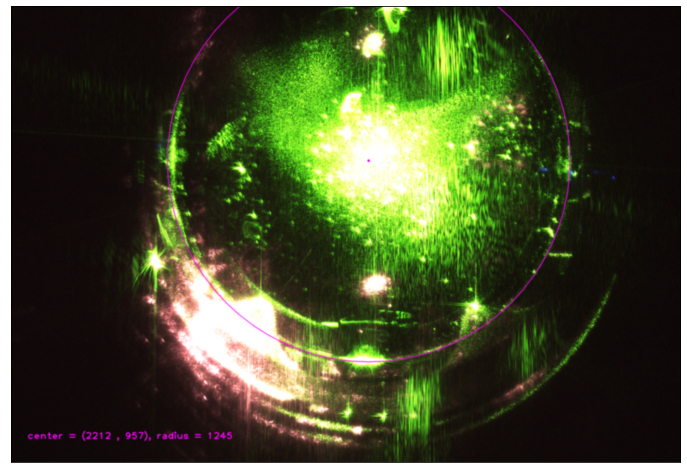

In [2]:
figname="TCam_ETMY_01111_2023_0314_130551.png"
data=[3348, 446, 1727, 2105, 2668, 2117]
x, y, r = compute_circle(data, figname=figname)

In [20]:
data=[1782, 2142, 3395, 543, 2766, 2092]
x, y, r = compute_circle(data)

fitted at 2023-01-17 13:59:50.976122
(x, y) = 2215.53, 966.26, r = 1253.12



fitted at 2023-01-17 10:20:07.546941
figname = TCam_ETMY_01111_2023_0104_110245.png
(x, y) = 2217.86, 978.60, r = 1238.00


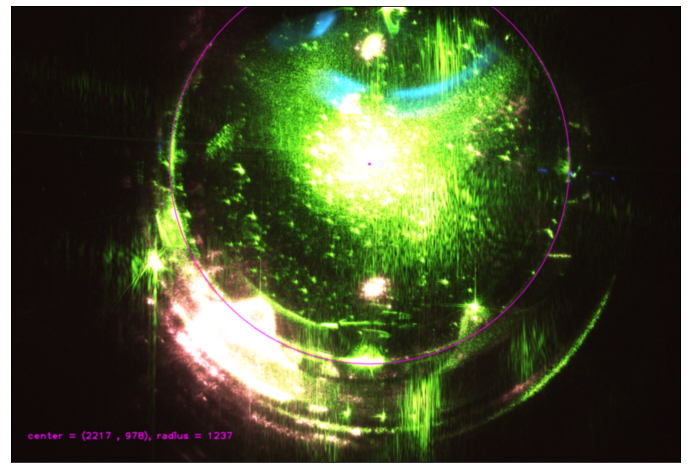

In [14]:
figname="TCam_ETMY_01111_2023_0104_110245.png"
data=[1702, 2104, 1256, 1758, 2755, 2094]
x, y, r = compute_circle(data, figname=figname)

fitted at 2023-01-17 10:18:24.025652
figname = TCam_ETMY_01111_2023_0104_110245.png
(x, y) = 2224.06, 966.65, r = 1248.32


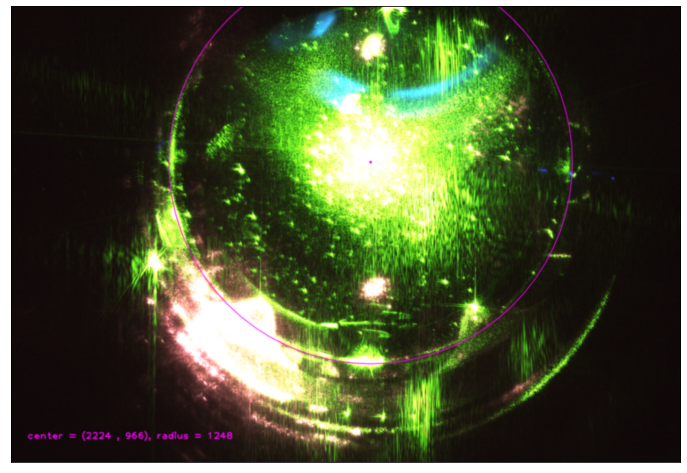

In [13]:
figname="TCam_ETMY_01111_2023_0104_110245.png"
data=[1702, 2104, 1256, 1758, 2755, 2094]
x, y, r = compute_circle(data, figname=figname)

In [16]:
figname="TCam_ETMY_00110_2022_0705_124009.png"
data=[3314, 371, 1728, 2128, 1264, 1772]
x, y, r = compute_circle(data, figname=figname)

figname="TCam_ETMY_00110_2022_0705_124009.png"
data=[3314, 371, 1728, 2128, 1264, 1772]
x, y, r = compute_circle(data, figname=figname)



fitted at 2022-07-05 15:23:57.487724
figname = TCam_ETMY_00110_2022_0705_124009.png
(x, y) = 2232.95, 989.48, r = 1245.47

fitted at 2022-07-05 15:23:57.488058
figname = TCam_ETMY_00110_2022_0705_124009.png
(x, y) = 2232.95, 989.48, r = 1245.47



## IX

In [17]:
figname="contour_TCam_ITMY_00010_2022_0615_155043.png"
data=[3136, 1125, 1116, 2352, 739, 1042]
x, y, r = compute_circle(data, figname=figname)

fitted at 2022-07-05 15:23:59.204069
figname = contour_TCam_ITMY_00010_2022_0615_155043.png
(x, y) = 1926.21, 1409.59, r = 1242.81



## IY

In [19]:
#figname="TCam_ETMX_01110_2022_0525_085749.png"
#data = [720, 1015, 1038, 2227, 3122, 1023]

figname="TCam_ETMX_01110_2022_0525_085749.png"
data=[757, 904, 3123, 1020, 1046, 2207]

#x, y, r = compute_circle(data, figname=figname, dataset=dataset, circles=circles)
x, y, r = compute_circle(data, figname=figname)

fitted at 2022-05-30 09:29:22.150912

figname = TCam_ETMX_01110_2022_0525_085749.png
(x, y) = 1922.00, 1329.16, r = 1240.15
TCam_ETMX_01110_2022_0525_085749.png


error: OpenCV(4.4.0) ../modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [15]:
dataset=[]
circles=[]

In [11]:
figname="TCam_ETMX_01110_2022_0525_090952.png"
data=[724, 1005, 1078, 2254, 3126, 1013]

#x, y, r = compute_circle(data, figname=figname)
x, y, r = compute_circle(data, figname=figname, dataset=dataset, circles=circles)

NameError: name 'dataset' is not defined

In [12]:
figname="TCam_ETMX_01110_2022_0525_090952.png"
data=[723, 1007, 1131, 2267, 3129, 1030]

#x, y, r = compute_circle(data, figname=figname, dataset=dataset, circles=circles)
x, y, r = compute_circle(data, figname=figname)
#dataset, circles

fitted at 2022-05-30 09:28:01.744648

figname = TCam_ETMX_01110_2022_0525_090952.png
(x, y) = 1923.17, 1314.43, r = 1238.92


error: OpenCV(4.4.0) ../modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [5]:
figname="5/30"
data=[738, 942, 3132, 1029, 1105, 2254]

#x, y, r = compute_circle(data, figname=figname, dataset=dataset, circles=circles)
x, y, r = compute_circle(data, figname=figname)
#dataset, circles

fitted at 2022-05-30 09:23:28.987833

figname = 5/30
(x, y) = 1922.92, 1317.88, r = 1243.11


fitted at 2022-05-30 09:33:51.273780

figname = TCam_ETMX_01110_2022_0530_090206_fit.png
(x, y) = 1921.48, 1336.70, r = 1245.38
TCam_ETMX_01110_2022_0530_090206_fit.png


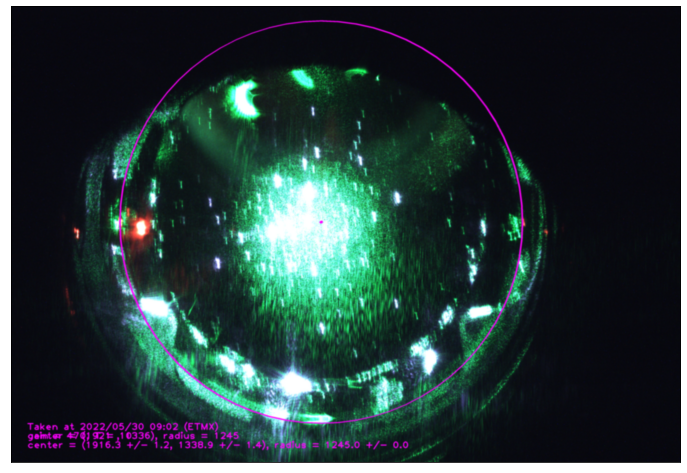

In [29]:
figname="TCam_ETMX_01110_2022_0530_090206_fit.png"
data=[743, 934, 1257, 2390, 3128, 1028]

#x, y, r = compute_circle(data, figname=figname, dataset=dataset, circles=circles)
x, y, r = compute_circle(data, figname=figname)
#dataset, circles